In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to load and preprocess the dataset
def load_and_preprocess_data(diabetes):
    data = pd.read_csv('/Users/enochjoy/Desktop/UCM/Masters/Spring 2024/Neural Networks/ICP 7/NN&DeepLearning_Lesson7_SourceCode/diabetes.csv')
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to normalize data
def normalize_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to define and compile the model
def build_model(input_dim):
    model = Sequential([
        Dense(20, input_dim=input_dim, activation='relu'),
        Dense(12, activation='relu'),  # Additional dense layer
        Dense(8, activation='relu'),   # Another additional dense layer
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the Diabetes dataset
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = load_and_preprocess_data('diabetes.csv')
X_train_diabetes, X_test_diabetes = normalize_data(X_train_diabetes, X_test_diabetes)

# Define and train the model for Diabetes
model_diabetes = build_model(X_train_diabetes.shape[1])
model_diabetes.fit(X_train_diabetes, y_train_diabetes, epochs=100, batch_size=10, verbose=1)

# Evaluate the Diabetes model
accuracy_diabetes = model_diabetes.evaluate(X_test_diabetes, y_test_diabetes, verbose=0)
print(f'Diabetes Model Accuracy: {accuracy_diabetes[1] * 100:.2f}%')

# Load and preprocess the Breast Cancer dataset
X_train_breast, X_test_breast, y_train_breast, y_test_breast = load_and_preprocess_data('breastcancer.csv')
X_train_breast, X_test_breast = normalize_data(X_train_breast, X_test_breast)

# Define and train the model for Breast Cancer
model_breast = build_model(X_train_breast.shape[1])
model_breast.fit(X_train_breast, y_train_breast, epochs=100, batch_size=10, verbose=1)

# Evaluate the Breast Cancer model
accuracy_breast = model_breast.evaluate(X_test_breast, y_test_breast, verbose=0)
print(f'Breast Cancer Model Accuracy: {accuracy_breast[1] * 100:.2f}%')


Epoch 1/100
62/62 [==============================] - 0s 420us/step - loss: 0.6725 - accuracy: 0.6101
Epoch 2/100
62/62 [==============================] - 0s 314us/step - loss: 0.5885 - accuracy: 0.7178
Epoch 3/100
62/62 [==============================] - 0s 298us/step - loss: 0.5169 - accuracy: 0.7471
Epoch 4/100
62/62 [==============================] - 0s 296us/step - loss: 0.4904 - accuracy: 0.7569
Epoch 5/100
62/62 [==============================] - 0s 301us/step - loss: 0.4770 - accuracy: 0.7667
Epoch 6/100
62/62 [==============================] - 0s 294us/step - loss: 0.4671 - accuracy: 0.7667
Epoch 7/100
62/62 [==============================] - 0s 284us/step - loss: 0.4608 - accuracy: 0.7830
Epoch 8/100
62/62 [==============================] - 0s 281us/step - loss: 0.4574 - accuracy: 0.7896
Epoch 9/100
62/62 [==============================] - 0s 280us/step - loss: 0.4520 - accuracy: 0.7830
Epoch 10/100
62/62 [==============================] - 0s 578us/step - loss: 0.4490 - accura

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
375/375 [==============================] - 1s 3ms/step - loss: 0.2538 - accuracy: 0.9233 - val_loss: 0.1519 - val_accuracy: 0.9511
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9711 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0601 - accuracy: 0.9812 - val_loss: 0.0914 - val_accuracy: 0.9754
Epoch 4/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9863 - val_loss: 0.0909 - val_accuracy: 0.9768
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 0.1075 - val_accuracy: 0.9728


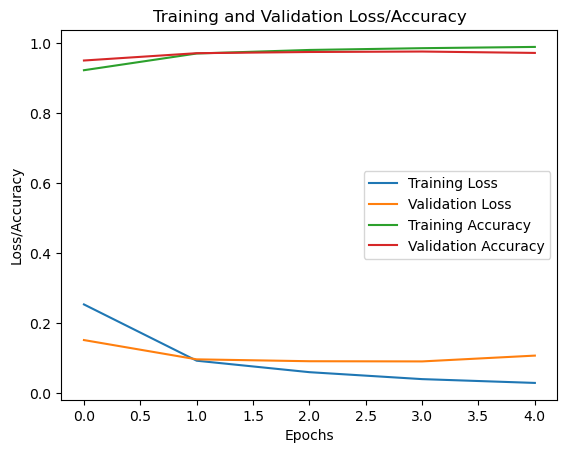

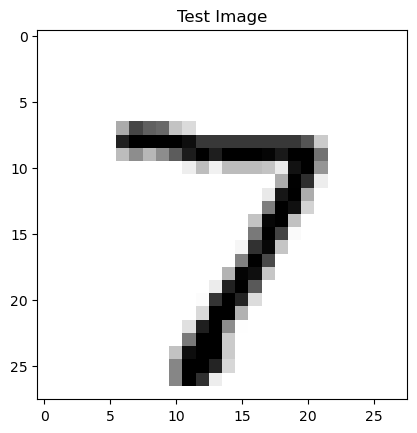

1/1 [==============================] - 0s 26ms/step
Predicted label: 7


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data by flattening and scaling
train_images_scaled = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images_scaled = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(256, activation='relu'),  # Adjust this layer as needed
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images_scaled, train_labels_categorical, epochs=5, batch_size=128, validation_split=0.2)

# Plot training and validation loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# Predict and plot one of the test images
test_image = test_images[0]
plt.imshow(test_image, cmap=plt.cm.binary)
plt.title('Test Image')
plt.show()

# Model inference on the single image
test_image_scaled = test_image.reshape((1, 28 * 28)).astype('float32') / 255
prediction = model.predict(test_image_scaled)
print(f'Predicted label: {np.argmax(prediction)}')

# For tasks 3 and 4, adjust the model layers and activations as described,
# and repeat the training and evaluation without scaling the images to observe the differences.
